In [1]:
# Works on pandas 2.0.0, numpy 1.24.2, matplotlib 3.7.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
ibm = pd.read_csv("ibm.csv")
ford = pd.read_csv("ford.csv")

In [3]:
# Function to compute returns
def compute_returns(df):
    y = df.iloc[:, 4]
    a = [0]
    for i in range(1, 121):  
        a.append((y[i] - y[i - 1]) / y[i])
    return a[1:]

In [4]:
# Compute returns for IBM and Forward Industries
x1 = compute_returns(ibm)
x2 = compute_returns(ford)

In [5]:
# MVAportfolio of assets
x = np.column_stack((x1, x2))

# Inverse of empirical variance
s1 = np.linalg.inv(np.cov(x.T))

# Vector of ones
one = np.ones(2)

# c2 weight
c2 = np.dot(s1, one) / np.dot(one.T, np.dot(s1, one))

# c1 weight
c1 = one / np.sum(one)

# Optimal MVAportfol_IBM_Ford returns
q1 = np.dot(x, c1)

# Nonoptimal MVAport_IBM_Ford returns
q2 = np.dot(x, c2)

In [6]:
# Time Series
t = np.arange(1, 121)
ts1 = pd.DataFrame({'Time': t, 'Returns': q1})
ts2 = pd.DataFrame({'Time': t, 'Returns': q2})

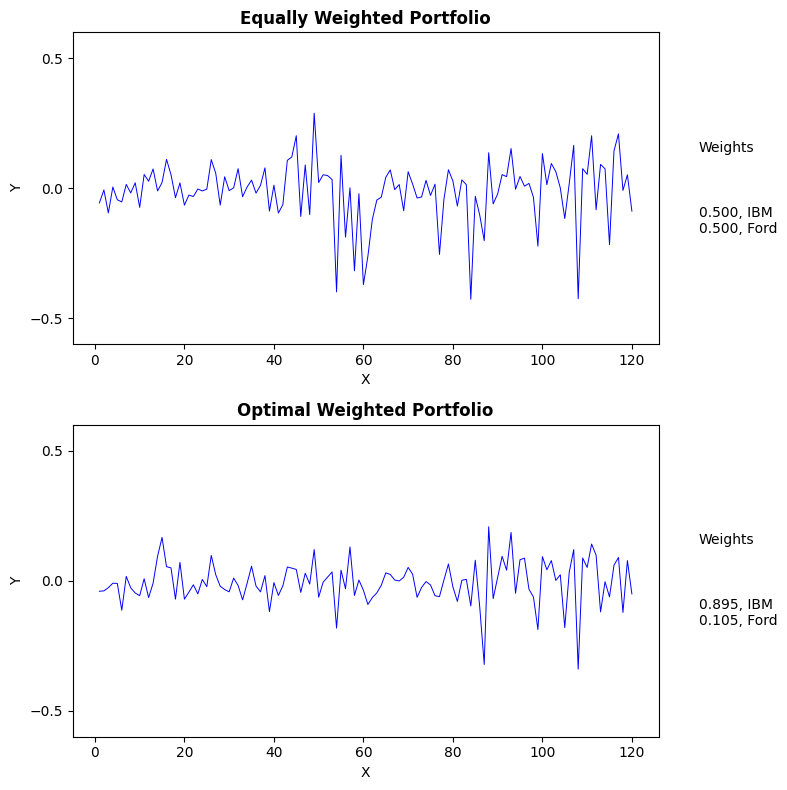

In [7]:
plt.figure(figsize=(8, 8))

# Equally Weighted Portfolio
plt.subplot(2, 1, 1)
plt.plot(ts1['Time'], ts1['Returns'], color='blue', linewidth=0.7)
plt.title('Equally Weighted Portfolio', fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-0.6, 0.6)
plt.yticks([-0.5, 0, 0.5])
plt.text(ts1['Time'].iloc[-1] + 15, 0, f"Weights\n\n\n\n{c1[0]:.3f}, IBM\n{c1[1]:.3f}, Ford", 
         verticalalignment='center')

# Optimal Weighted Portfolio
plt.subplot(2, 1, 2)
plt.plot(ts2['Time'], ts2['Returns'], color='blue', linewidth=0.7)
plt.title('Optimal Weighted Portfolio', fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-0.6, 0.6)
plt.yticks([-0.5, 0, 0.5])
plt.text(ts2['Time'].iloc[-1] + 15, 0, f"Weights\n\n\n\n{c2[0]:.3f}, IBM\n{c2[1]:.3f}, Ford", 
         verticalalignment='center')

plt.tight_layout()
plt.show()